# Predicting Boston Housing Prices

## 1. Statistical Analysis and Data Exploration
* Number of data points (houses)?
> 506

* Number of features?
> 13

* Minimum and maximum housing prices?
> \$5,000 - \$50,000

* Mean and median Boston housing prices?
> mean \$22,532 and median \$21,200

* Standard deviation?
> \$9,188


In [1]:
# Load libraries
%matplotlib inline
import numpy as np
import pylab as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import grid_search
from sklearn import cross_validation
from sklearn import metrics
import matplotlib.pyplot as plt

['data', 'feature_names', 'DESCR', 'target']

### Load dataset and look at features and description

In [ ]:
# Load dataset
boston = datasets.load_boston()
boston.keys()

In [32]:
# Look at features and description
for i in range(len(boston.feature_names)):
    print i, ": ", boston.feature_names[i], " (", boston.data[0][i], ")"
print "14 :  Median value in 000's", " (", boston.target[0], ")"
print ""

for line in boston.DESCR.split('\n'):
    print line

0 :  CRIM  ( 0.00632 )
1 :  ZN  ( 18.0 )
2 :  INDUS  ( 2.31 )
3 :  CHAS  ( 0.0 )
4 :  NOX  ( 0.538 )
5 :  RM  ( 6.575 )
6 :  AGE  ( 65.2 )
7 :  DIS  ( 4.09 )
8 :  RAD  ( 1.0 )
9 :  TAX  ( 296.0 )
10 :  PTRATIO  ( 15.3 )
11 :  B  ( 396.9 )
12 :  LSTAT  ( 4.98 )
14 :  Median value in 000's  ( 24.0 )

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      p

### Explore dataset stats

In [2]:
def explore_city_data(city_data):
    # Get the labels and features from the housing data
    housing_prices = city_data.target
    housing_features = city_data.data
    
    housing_stats = {}
    # Size of data?
    housing_stats['size'] = len(housing_features)
    # Number of features?
    housing_stats['num_features'] = len(housing_features[0])
    # Minimum value?
    housing_stats['min_price'] = np.min(housing_prices)
    # Maximum Value?
    housing_stats['max_price'] = np.max(housing_prices)
    # Calculate mean?
    housing_stats['mean_price'] = np.mean(housing_prices)
    # Calculate median?
    housing_stats['median_price'] = np.median(housing_prices)
    # Calculate standard deviation?
    housing_stats['stdev_price'] = np.std(housing_prices)
    
    return housing_stats
    
explore_city_data(boston)


{'max_price': 50.0,
 'mean_price': 22.532806324110677,
 'median_price': 21.199999999999999,
 'min_price': 5.0,
 'num_features': 13,
 'size': 506,
 'stdev_price': 9.1880115452782025}

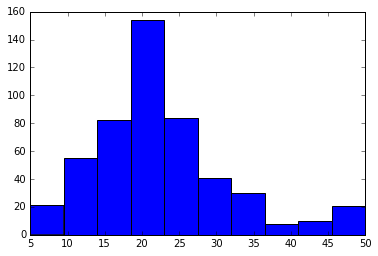

In [2]:
# plot the housing prices
plt.hist(boston.target)
plt.show()

## 2. Evaluating Model Performance
* Which measure of model performance is best to use for predicting Boston housing data and analyzing the errors? Why do you think this measurement most appropriate? Why might the other measurements not be appropriate here? 
> RMSE (root mean squared error). Mean squared error amplifies large errors.
> Want to know avg diff in regression prediction.
> Absolute mean error could work and put less weight on existence of large errors.
> Median absolute error would place less weight on outliers.

* Why is it important to split the Boston housing data into training and testing data? What happens if you do not do this? 
> Tune the model’s bias/variance.
> Overfitting.

* What does grid search do and why might you want to use it? 
> Param-tuning, cross-validating.
> GridCV is a way of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

* Why is cross validation useful and why might we use it with grid search?
> CV is useful to tune learning parameters, and it's used with grid search in order to find the best learning model.

### Select performance metric

In [4]:
# calculate performance metric -- mean squared error (amplifies large errors)
def performance_metric(label, prediction):
    return metrics.mean_squared_error(label, prediction)

### Split into train and test sets

In [58]:
# divide into train and test sets
def split_data(city_data):
    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(\
        X, y, test_size=0.3, random_state=0)

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(boston)

### Learning curve functions

In [59]:
def learning_curve(depth, X_train, y_train, X_test, y_test):
    """Calculate the performance of the model after a set of training data."""

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    print "Decision Tree with Max Depth: "
    print depth

    for i, s in enumerate(sizes):

        # Create and fit the decision tree regressor model
        regressor = DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s], y_train[:s])

        # Find the performance on the training and testing set
        train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot learning curve graph
    learning_curve_graph(sizes, train_err, test_err)

def learning_curve_graph(sizes, train_err, test_err):
    """Plot training and test error as a function of the training size."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Training Size')
    pl.plot(sizes, test_err, lw=2, label = 'test error')
    pl.plot(sizes, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Training Size')
    pl.ylabel('Error')
    pl.show()


### Plot learning curve graphs for depths 1 thru 10

Decision Tree with Max Depth: 
1


/Users/jjl/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jjl/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


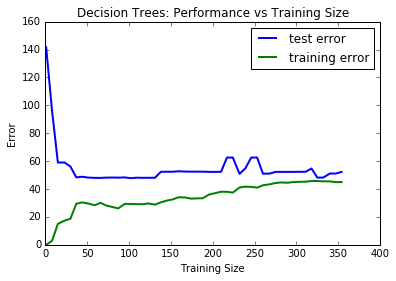

Decision Tree with Max Depth: 
2


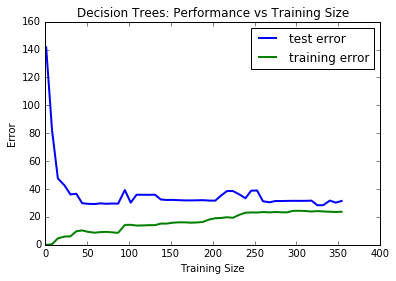

Decision Tree with Max Depth: 
3


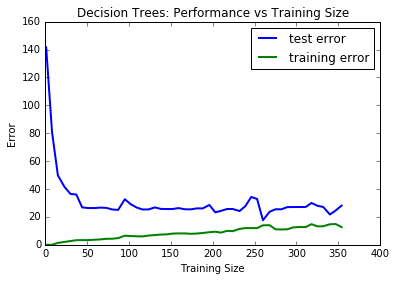

Decision Tree with Max Depth: 
4


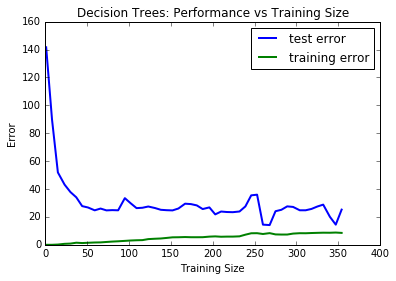

Decision Tree with Max Depth: 
5


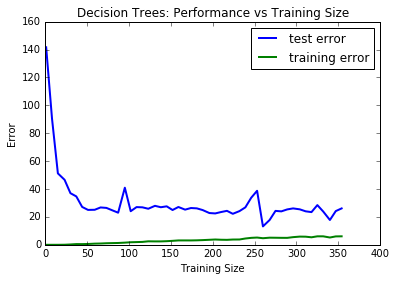

Decision Tree with Max Depth: 
6


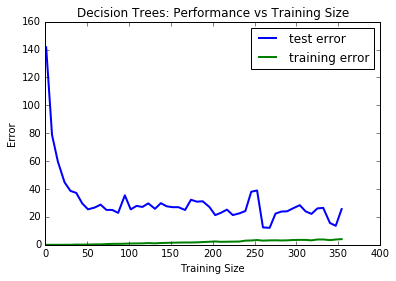

Decision Tree with Max Depth: 
7


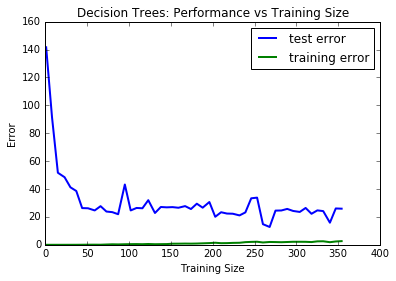

Decision Tree with Max Depth: 
8


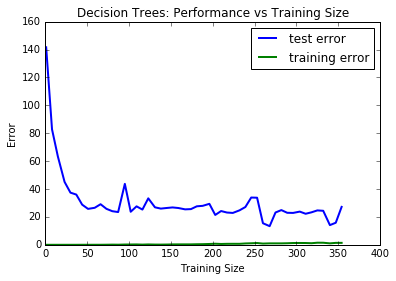

Decision Tree with Max Depth: 
9


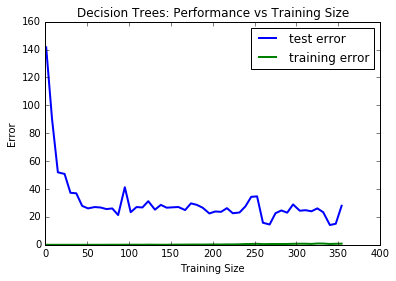

Decision Tree with Max Depth: 
10


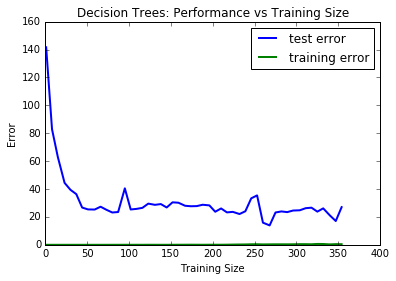

In [60]:
# Learning Curve Graphs
max_depths = [1,2,3,4,5,6,7,8,9,10]
for max_depth in max_depths:
    learning_curve(max_depth, X_train, y_train, X_test, y_test)

## 3. Analyzing Model Performance
* Look at all learning curve graphs provided. What is the general trend of training and testing error as training size increases?
> Error decreases.

* Look at the learning curves for the decision tree regressor with max depth 1 and 10 (first and last learning curve graphs). When the model is fully trained does it suffer from either high bias/underfitting or high variance/overfitting?
> High max depth leads to high variance and overfitting.

* Look at the model complexity graph. How do the training and test error relate to increasing model complexity? Based on this relationship, which model (max depth) best generalizes the dataset and why?
> Increasing model complexity reduces training error near zero, but test error remains in a fluctuating range well above zero. A model with depth 9 best generalizes the dataset because the test error is near its lowest point in the graph, without having to increase model complexity any further.

Model Complexity: 


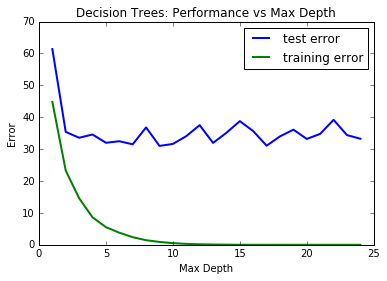

In [59]:
def model_complexity(X_train, y_train, X_test, y_test):
    """Calculate the performance of the model as model complexity increases."""

    print "Model Complexity: "

    # We will vary the depth of decision trees from 2 to 25
    max_depth = np.arange(1, 25)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth=d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    model_complexity_graph(max_depth, train_err, test_err)


def model_complexity_graph(max_depth, train_err, test_err):
    """Plot training and test error as a function of the depth of the decision tree learn."""

    pl.figure()
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(max_depth, test_err, lw=2, label = 'test error')
    pl.plot(max_depth, train_err, lw=2, label = 'training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')
    pl.show()
    
model_complexity(X_train, y_train, X_test, y_test)

## 4. Model Prediction
* Model makes predicted housing price with detailed model parameters (max depth) reported using grid search. Note due to the small randomization of the code it is recommended to run the program several times to identify the most common/reasonable price/model complexity.
* Compare prediction to earlier statistics and make a case if you think it is a valid model.
> The model generally gives a prediction price in the \$19,000 -$22,000 range, which is within the dataset's range of prices as well as 1 sd of the mean price. The model appears to be valid.

### Find and tune the optimal model

In [51]:
def fit_predict_model(city_data):
    # Get the features and labels from the Boston housing data
    X, y = city_data.data, city_data.target

    # Setup a Decision Tree Regressor
    regressor = DecisionTreeRegressor()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # 1. Find the best performance metric
    # should be the same as your performance_metric procedure
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better=False)

    # 2. Use gridearch to fine tune the Decision Tree Regressor and find the best model
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    reg = grid_search.GridSearchCV(regressor, parameters, scoring=mse_scorer, cv=None)

    # Fit the learner to the training data
    print "Final Model: "
    print reg.fit(X, y)
    print reg.grid_scores_
    print reg.best_estimator_
    print reg.best_score_
    print reg.best_params_

    # Use the model to predict the output of a particular sample
    x = [11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]
    y = reg.predict(x)
    print "House: " + str(x)
    print "Prediction: " + str(y)

### Tune and predict model

In [57]:
fit_predict_model(boston)

Final Model: 
GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
[mean: -68.08279, std: 25.52601, params: {'max_depth': 1}, mean: -46.72022, std: 21.02827, params: {'max_depth': 2}, mean: -44.96641, std: 13.29444, params: {'max_depth': 3}, mean: -36.23963, std: 11.15775, params: {'max_depth': 4}, mean: -37.15245, std: 14.57597, params: {'max_depth': 5}, mean: -39.92964, std: 5.33534, params: {'max_depth': 6}, mean: -40.44737, std: 13.01829, params: {'max_depth': 7}, mean: -45.42239, std: 9.44

/Users/jjl/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
